# **Práctica sobre análisis de Fourier**

**Objetivos**

1. Analizar el comportamiento espectral de diferentes señales a partir del uso de herramientas de simulación como Python
2. Comprender el proceso de cálculo de la Transformada Discreta de Fourier (en Inglés, DFT)
3. Comprender el proceso de cálculo de la Transformada de Fourier de Tiempo Corto (en Inglés, STFT) como paso previo a la construcción de un espectrograma


# **Serie de Fourier**

Serie Compleja:

$$f(t) = \sum_{n=-∞}^{∞}{c_n e^{j2πnf_ot}}$$

$$c_n = \frac{1}{T_o}∫_{T_o}f(t)e^{-j2πnf_ot}dt $$

También existe la posibilidad de calcularla mediante los términos de la serie real:

$$f(t) = \frac{a_0}{2}+ \sum_{n=1}^{∞}a_ncos(nω_0t)+ \sum_{n=1}^{∞}b_nsin(nω_0t) $$

Coeficientes de la serie real:

$$a_0 = \frac{2}{T_0}∫_{T_0}f(t)dt, a_n=\frac{2}{T_0}∫_{T_0}f(t)cos(nω_0t)dt, b_n=\frac{2}{T_0}∫_{T_0}f(t)sin(nω_0t)dt$$

Relación entre coeficientes reales y complejos:

$$|c_n| = \sqrt{a_n^2 + b_n^2 }$$


\\



1. Analice las funciones que se entregan a continuación, donde se calculan los N primeros coeficientes de la serie de Fourier para la señal de tren pulsado. Luego realice el mismo procedimiento para las siguientes señales periódicas:

Para la señal (a) Diente de sierra unipolar con T = 0.01, y (b) triangular bipolar con T = 0.01, realice:

* Identifique la potencia de cada armónico de las señales.

* Reconstruya la señal en el tiempo usando los coeficientes de la serie de Fourier.

* Grafique la serie de Fourier usando la función *plt.stem()* para mostrar cada uno de los armónicos y su frecuencia correspondiente.

In [3]:
from sympy import integrate, exp, symbols, Piecewise
import numpy as np
import matplotlib.pyplot as plt

def serie_fourier(Cn, N, T, f, fs, t):
    n_armonics = np.arange(-N,N+1,1)
    freq_spectrum = n_armonics*f
    #Compute n coeficients
    #Cn_eval = [np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0]]

    f_t = 0
    Cn_eval = []
    for i in n_armonics:
        Cn_eval.append(np.abs(np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0])) # "fromiter" convierte
        # los valores complejos simbólicos en complejos numéricos. Como genera lista, hay que evaluar el resultado
        # en la posición [0]
        armonic = np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)*np.exp((1j*i*2*np.pi*f*t))
        f_t = f_t + armonic

    for i in n_armonics:
        if(i>=0):
           print("Freq = "+str((1/T)*i)+" Hz"+":"+" |c_"+str(i)+"| = "+str(Cn_eval[i+N])+ " |c_"+str(i)+"|^2 = "+str(Cn_eval[i+N]**2))


    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.stem(freq_spectrum,np.asarray(Cn_eval)**2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel('Potencia [lineal]')
    plt.title("Espectro")

    plt.subplot(122)
    plt.plot(t,f_t)
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Serie de Fourier N = "+str(N)+" Terminos")
    plt.grid()
    plt.show()



Freq = 0.0 Hz: |c_0| = 0.5 |c_0|^2 = 0.25
Freq = 1000.0 Hz: |c_1| = 0.3183098861837907 |c_1|^2 = 0.10132118364233779
Freq = 2000.0 Hz: |c_2| = 1.949085916259688e-17 |c_2|^2 = 3.798935908961868e-34
Freq = 3000.0 Hz: |c_3| = 0.1061032953945969 |c_3|^2 = 0.011257909293593087
Freq = 4000.0 Hz: |c_4| = 1.949085916259688e-17 |c_4|^2 = 3.798935908961868e-34
Freq = 5000.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.004052847345693513


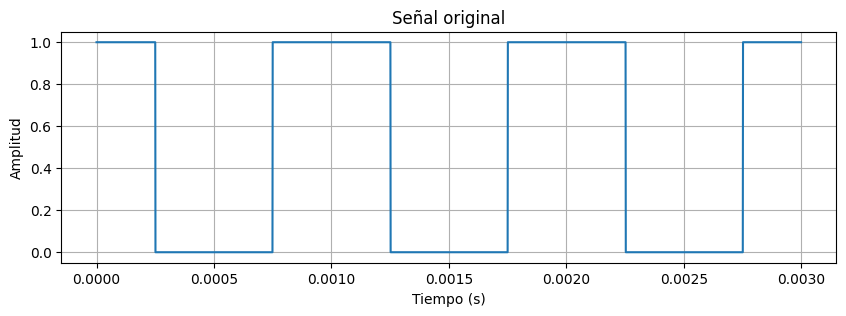

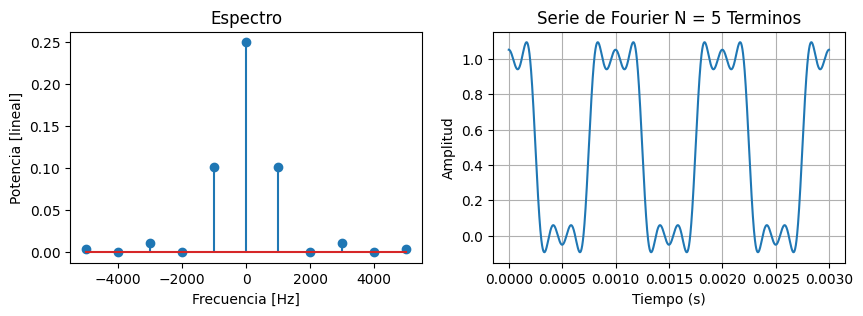

Freq = 0.0 Hz: |c_0| = 0.0 |c_0|^2 = 0.0
Freq = 1000.0 Hz: |c_1| = 0.4052847345693511 |c_1|^2 = 0.16425571607494938
Freq = 2000.0 Hz: |c_2| = 3.898171832519376e-17 |c_2|^2 = 1.5195743635847472e-33
Freq = 3000.0 Hz: |c_3| = 0.04503163717437231 |c_3|^2 = 0.00202784834660431
Freq = 4000.0 Hz: |c_4| = 3.898171832519376e-17 |c_4|^2 = 1.5195743635847472e-33
Freq = 5000.0 Hz: |c_5| = 0.016211389382774007 |c_5|^2 = 0.00026280914571991776


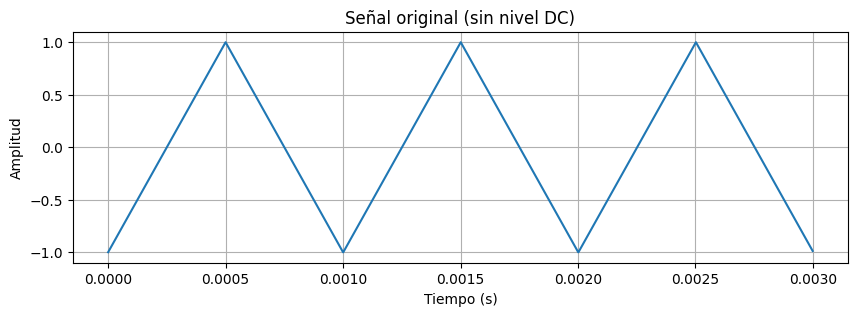

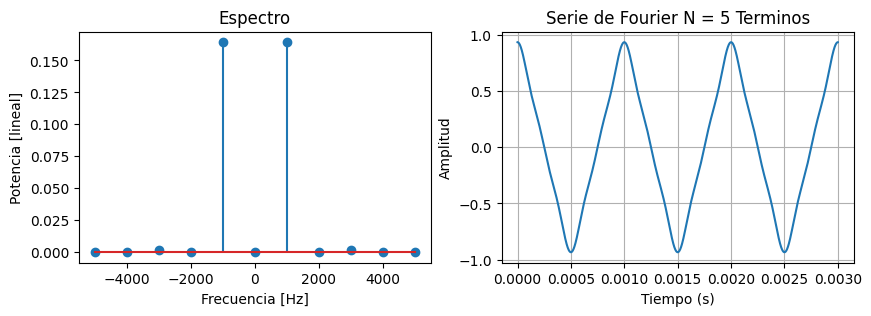

Freq = 0.0 Hz: |c_0| = 0.0 |c_0|^2 = 0.0
Freq = 1000.0 Hz: |c_1| = 0.3183098861837907 |c_1|^2 = 0.10132118364233779
Freq = 2000.0 Hz: |c_2| = 0.15915494309189535 |c_2|^2 = 0.025330295910584447
Freq = 3000.0 Hz: |c_3| = 0.1061032953945969 |c_3|^2 = 0.011257909293593087
Freq = 4000.0 Hz: |c_4| = 0.07957747154594767 |c_4|^2 = 0.006332573977646112
Freq = 5000.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.004052847345693513


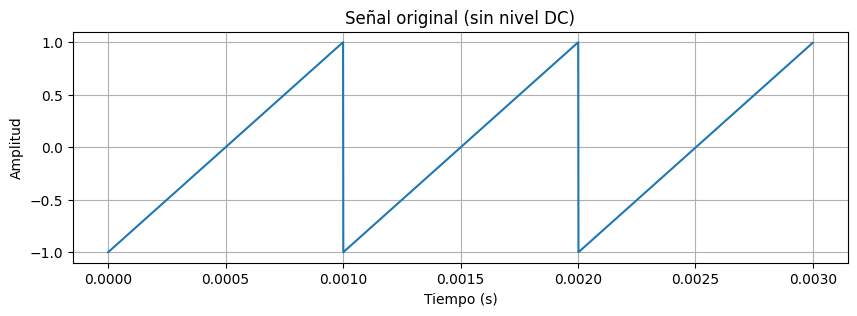

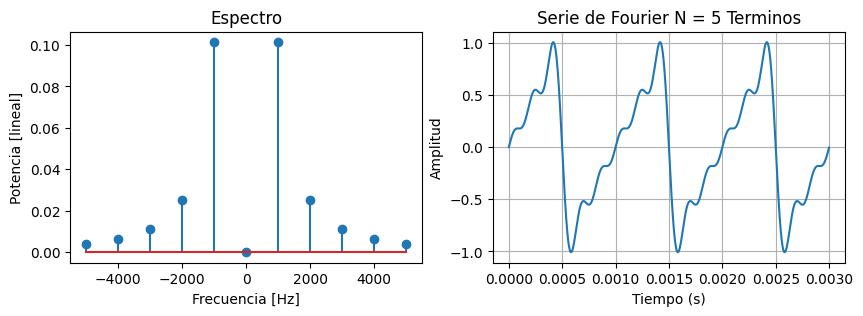

In [4]:
def señal_cuadrada():
    f=1000
    fs = 1e6 # fs para contruir el tren pulsado "continuo" en el computador
    T=1/f
    N_periods = 3
    A=1
    W0 = 2*np.pi*f # Frecuencia fundamental de la función

    time_period = np.arange(0,T,1/fs)
    ft_real_period = [A if 0 <= t <= T/4 or 3*T/4 <= t <= T else 0 for t in time_period ]
    time = np.arange(0,N_periods*T,1/fs)
    #Graficar X cantidad de periodos de la señal
    ft_real = np.hstack([ft_real_period for p in range(N_periods)])
    plt.figure(figsize=(10,3))
    plt.plot(time, ft_real[0:len(time)])
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Señal original")
    plt.grid()



    n, t_simbol = symbols('n t_simbol')
    N = 5 # N armónicos

    Cn = (1/T)*integrate(A*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/4,T/4))

    serie_fourier(Cn,N,T,f,fs, time)
    
def señal_triangular():
    f = 1000
    fs = 1e6  # fs para construir el tren pulsado "continuo" en el computador
    T = 1 / f
    N_periods = 3
    A = 1
    W0 = 2 * np.pi * f  # Frecuencia fundamental de la función

    time_period = np.arange(0, T, 1 / fs)
    ft_real_period = [A * (4 * t / T)-1 if 0 <= t <= T / 2 else A * (4 * (T - t) / T)-1 for t in time_period]
    #ft_real_period = [A * (4 * t / T) if 0 <= t <= T / 2 else A * (4 * (T - t) / T) for t in time_period]

    time = np.arange(0, N_periods * T, 1 / fs)
    # Graficar X cantidad de periodos de la señal
    ft_real = np.hstack([ft_real_period for p in range(N_periods)])
    plt.figure(figsize=(10, 3))
    plt.plot(time, ft_real[0:len(time)])
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Señal original (sin nivel DC)")
    plt.grid()
    n,t_simbol = symbols('n t_simbol')
    N = 5 # N armónicos
    f_t = Piecewise(
        ((4*A/T)*t_simbol + 1, (t_simbol >= -T/2) & (t_simbol < 0)),
        (-(4*A/T)*t_simbol + 1, (t_simbol >= 0) & (t_simbol <= T/2))
    )
    #f_t= f_t+1
    Cn = (1/T)*integrate((f_t)*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/2,T/2))
    serie_fourier(Cn,N,T,f,fs, time)

def señal_diente_sierra():
    f = 1000
    fs = 1e6  # fs para construir el tren pulsado "continuo" en el computador
    T = 1 / f
    N_periods = 3
    A = 1
    W0 = 2 * np.pi * f  # Frecuencia fundamental de la función

    time_period = np.arange(0, T, 1 / fs)
    # Señal diente de sierra centrada en 0
    ft_real_period = [2 * A * (t / T - 0.5) for t in time_period]
    #ft_real_period = [2 * A * (t / T - 0.5)+1 for t in time_period]
    # Quitar el nivel DC (restar el valor medio)


    time = np.arange(0, N_periods * T, 1 / fs)
    # Graficar X cantidad de periodos de la señal
    ft_real = np.hstack([ft_real_period for p in range(N_periods)])
    plt.figure(figsize=(10, 3))
    plt.plot(time, ft_real[0:len(time)])
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Señal original (sin nivel DC)")
    plt.grid()
    n,t_simbol = symbols('n t_simbol')
    N = 5 # N armónicos
    f_t = 2 * A * (t_simbol / T)
    #f_t= f_t+1
    Cn = (1/T)*integrate(f_t*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/2,T/2))
    serie_fourier(Cn,N,T,f,fs, time)
n,t_simbol = symbols('n t_simbol')
señal_cuadrada()
señal_triangular()
señal_diente_sierra()


2. Considere una señal de tren pulsado con frecuencia 1000 Hz y ciclo de dureza del 50%. Calcule:

a) La potencia de la señal

b) La potencia de cada armónico

c) El número de componentes necesarios para alcanzar el 90% de la potencia

d) El ancho de banda

e) Modifice los parámetros de frecuencia y ciclo de dureza de la señal y concluya lo que se observa en el espectro resultante. Pruebe al menos 5 valores diferentes.

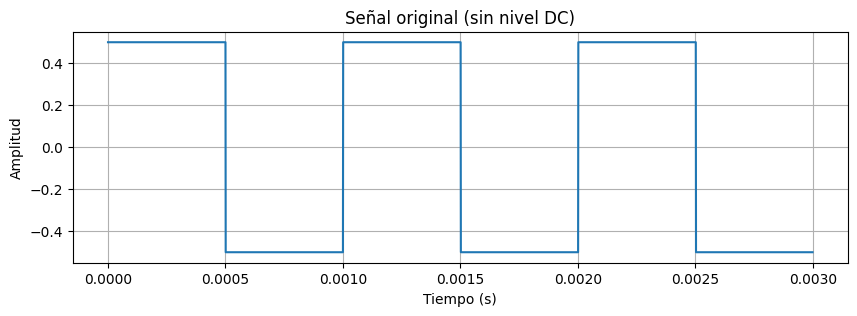

Potencia promedio de la señal:  0.500000000000000
Cn= -5 P= 0.00405284734569351
Cn= -4 P= 3.79893590896187e-34
Cn= -3 P= 0.0112579092935931
Cn= -2 P= 3.79893590896187e-34
Cn= -1 P= 0.101321183642338
Cn= 0 P= 0.250000000000000
Cn= 1 P= 0.101321183642338
Cn= 2 P= 3.79893590896187e-34
Cn= 3 P= 0.0112579092935931
Cn= 4 P= 3.79893590896187e-34
Cn= 5 P= 0.00405284734569351
Potencia total: 0.48326388056324876
90% de la potencia: 0.4349374925069239
Se requieren 3 armónicos (de los 11 posibles) para alcanzar el 90% de la potencia.
Ancho de banda estimado: 2000.00 Hz
Freq = 0.0 Hz: |c_0| = 0.1 |c_0|^2 = 0.010000000000000002
Freq = 1000.0 Hz: |c_1| = 0.09836316430834659 |c_1|^2 = 0.009675312092750788
Freq = 2000.0 Hz: |c_2| = 0.09354892837886392 |c_2|^2 = 0.00875140200083381
Freq = 3000.0 Hz: |c_3| = 0.08583936913341399 |c_3|^2 = 0.007368397293222506
Freq = 4000.0 Hz: |c_4| = 0.07568267286406571 |c_4|^2 = 0.005727866971849189
Freq = 5000.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.0040528473456

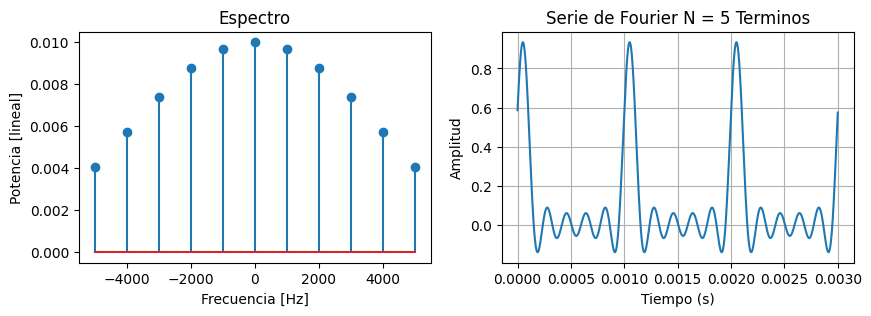

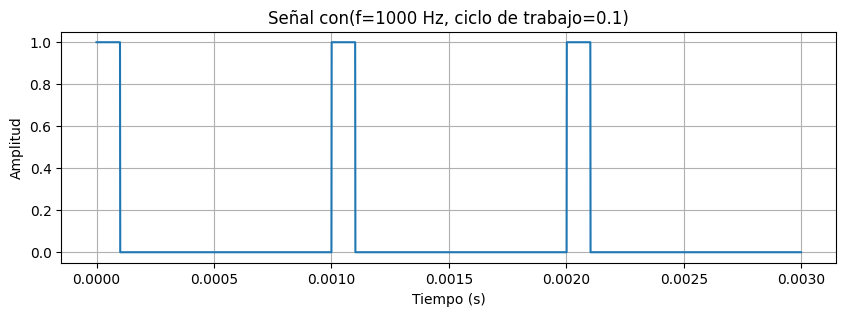

Freq = 0.0 Hz: |c_0| = 0.9000000000000001 |c_0|^2 = 0.8100000000000003
Freq = 1000.0 Hz: |c_1| = 0.09836316430834664 |c_1|^2 = 0.009675312092750799
Freq = 2000.0 Hz: |c_2| = 0.09354892837886393 |c_2|^2 = 0.008751402000833812
Freq = 3000.0 Hz: |c_3| = 0.085839369133414 |c_3|^2 = 0.007368397293222508
Freq = 4000.0 Hz: |c_4| = 0.0756826728640657 |c_4|^2 = 0.005727866971849187
Freq = 5000.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.004052847345693513


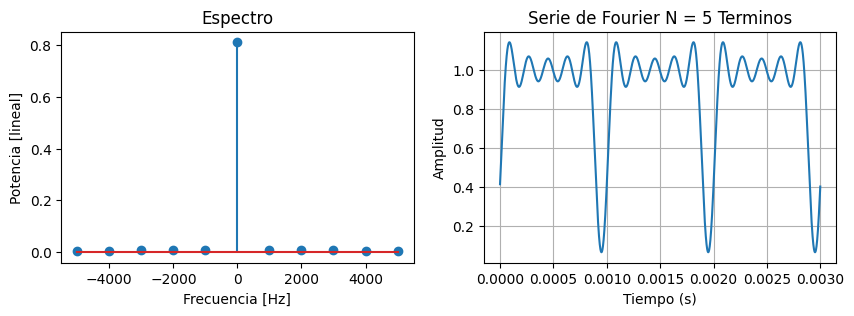

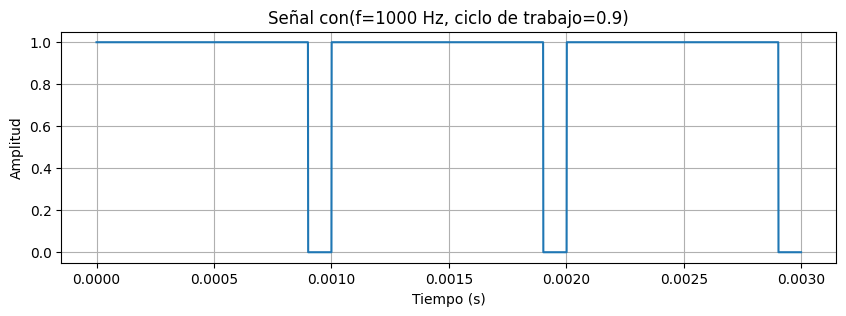

Freq = 0.0 Hz: |c_0| = 0.3 |c_0|^2 = 0.09
Freq = 2000.0 Hz: |c_1| = 0.2575181074002419 |c_1|^2 = 0.06631557563900252
Freq = 4000.0 Hz: |c_2| = 0.1513653457281314 |c_2|^2 = 0.022911467887396748
Freq = 6000.0 Hz: |c_3| = 0.03278772143611559 |c_3|^2 = 0.0010750346769723136
Freq = 8000.0 Hz: |c_4| = 0.046774464189431916 |c_4|^2 = 0.0021878505002084487
Freq = 10000.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.004052847345693513


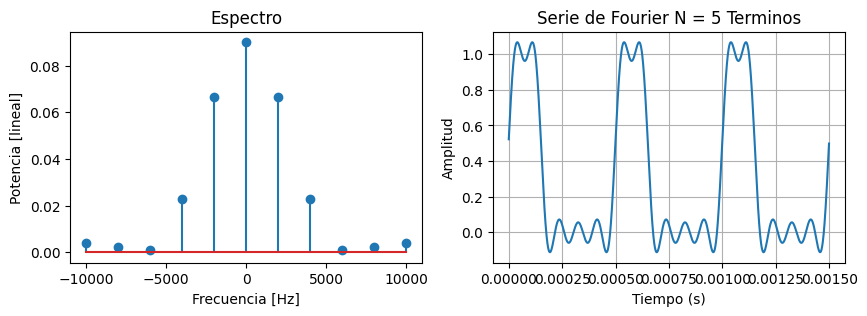

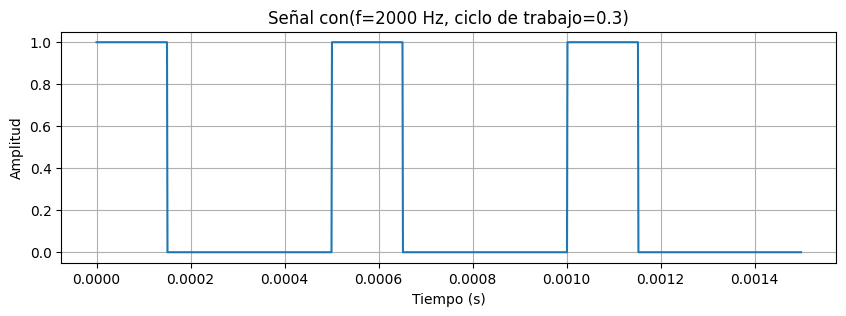

Freq = 0.0 Hz: |c_0| = 0.7 |c_0|^2 = 0.48999999999999994
Freq = 500.0 Hz: |c_1| = 0.257518107400242 |c_1|^2 = 0.06631557563900257
Freq = 1000.0 Hz: |c_2| = 0.15136534572813137 |c_2|^2 = 0.022911467887396737
Freq = 1500.0 Hz: |c_3| = 0.03278772143611551 |c_3|^2 = 0.0010750346769723086
Freq = 2000.0 Hz: |c_4| = 0.046774464189431986 |c_4|^2 = 0.0021878505002084552
Freq = 2500.0 Hz: |c_5| = 0.06366197723675815 |c_5|^2 = 0.004052847345693513


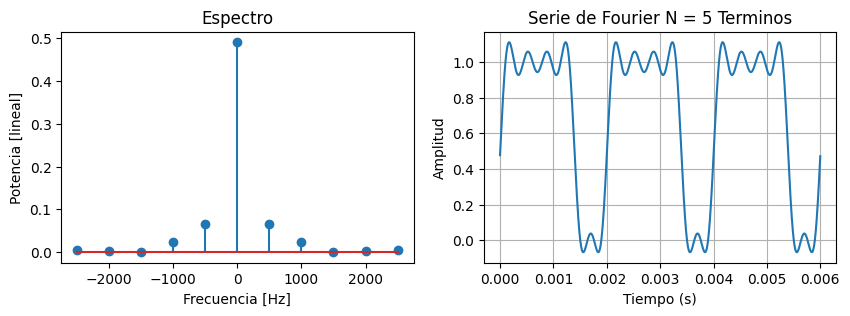

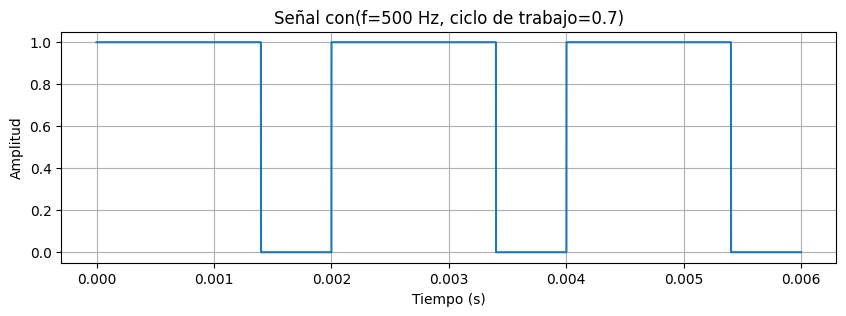

Freq = 0.0 Hz: |c_0| = 0.2 |c_0|^2 = 0.04000000000000001
Freq = 1500.0 Hz: |c_1| = 0.1870978567577278 |c_1|^2 = 0.03500560800333523
Freq = 3000.0 Hz: |c_2| = 0.15136534572813137 |c_2|^2 = 0.022911467887396737
Freq = 4500.0 Hz: |c_3| = 0.10091023048542094 |c_3|^2 = 0.010182874616620778
Freq = 6000.0 Hz: |c_4| = 0.04677446418943196 |c_4|^2 = 0.0021878505002084526
Freq = 7500.0 Hz: |c_5| = 7.796343665038752e-18 |c_5|^2 = 6.078297454338988e-35


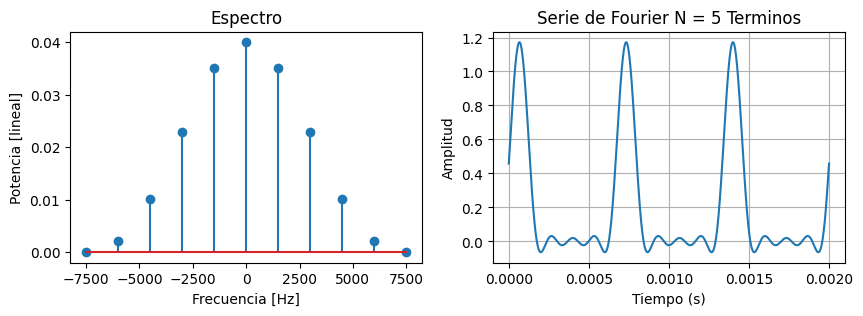

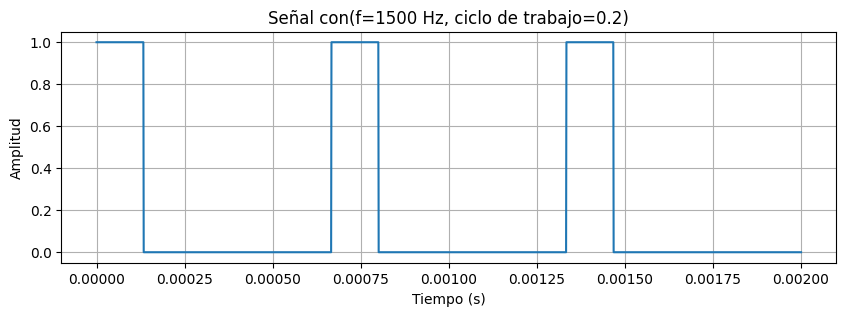

In [5]:
def señal(f=1000, duty=0.5):
    T = 1 / f
    A = 1
    fs = 1e6  # fs para construir el tren pulsado "continuo" en el computador
    time_period = np.arange(0, T, 1 / fs)
    ft_real_period = [A if 0 <= t <= duty * T else 0 for t in time_period]
    # Quitar el nivel DC (restar el valor medio)
    ft_real_period = np.array(ft_real_period)
    ft_real_period = ft_real_period - np.mean(ft_real_period)
    time = np.arange(0, 3 * T, 1 / fs)
    # Graficar X cantidad de periodos de la señal
    ft_real = np.hstack([ft_real_period for p in range(3)])
    plt.figure(figsize=(10, 3))
    plt.plot(time, ft_real[0:len(time)])
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Señal original (sin nivel DC)")
    plt.grid()
    plt.show()

def potencia(f=1000, duty=0.5):
    T = 1 / f
    A = 1
    t = symbols('t')
    x_t = Piecewise((A, (t >= 0) & (t < duty*T)), (0, True))
    print("=" * 50)
    P = (1/T) * integrate(abs(x_t**2), (t, 0, T))
    print("Potencia promedio de la señal: ", P)
    return P
def potencia_armonico(f=1000, duty=0.5):
    T = 1 / f
    A = 1
    t_simbol, n = symbols('t_simbol n')
    W0 = 2 * np.pi * f
    print("=" * 50)

    # Definir la señal periódica (tren de pulsos)
    x_t = Piecewise((A, (t_simbol >= 0) & (t_simbol < duty*T)), (0, True))

    for k in range(-5, 6):  # De -5 a 5 inclusive
        # Evaluar Cn para n = k
        Cn_k = (1 / T) * integrate(x_t * exp(-1j * W0 * k * t_simbol), (t_simbol, 0, duty * T))
        potencia_k = abs(Cn_k)**2
        potencia_k_eval = potencia_k.evalf().as_real_imag()[0]
        print("Cn=", k, "P=", potencia_k_eval)
def numero_de_armonicos(f=1000, duty=0.5):
    T = 1 / f
    A = 1
    t_simbol, n = symbols('t_simbol n')
    W0 = 2 * np.pi * f

    x_t = Piecewise((A, (t_simbol >= 0) & (t_simbol < duty*T)), (0, True))

    potencias = []
    armonicos = list(range(-5, 6))
    print("=" * 50)

    for k in armonicos:
        Cn_k = (1 / T) * integrate(x_t * exp(-1j * W0 * k * t_simbol), (t_simbol, 0, duty * T))
        potencia_k = abs(Cn_k)**2
        potencia_k_eval = potencia_k.evalf().as_real_imag()[0]
        potencias.append(float(potencia_k_eval.evalf()))

    potencias = np.array(potencias)
    total_power = np.sum(potencias)

    # Índices ordenados por potencia descendente
    indices_ordenados = np.argsort(potencias)[::-1]

    suma = 0
    n_componentes = 0
    for idx in indices_ordenados:
        suma += potencias[idx]
        n_componentes += 1
        if suma >= 0.9 * total_power:
            break

    print("Potencia total:", total_power)
    print("90% de la potencia:", 0.9 * total_power)
    print("Se requieren", n_componentes, "armónicos (de los 11 posibles) para alcanzar el 90% de la potencia.")
def ancho_de_banda(frecuencia_hz=1000, ciclo_trabajo=0.5):
    if not (0 < ciclo_trabajo <= 1):
        raise ValueError("El ciclo de trabajo debe estar entre 0 y 1 (no inclusive de 0).")
    print("=" * 50)
    periodo = 1.0 / frecuencia_hz
    duracion_pulso = ciclo_trabajo * periodo
    ancho_de_banda = 1.0 / duracion_pulso
    print(f"Ancho de banda estimado: {ancho_de_banda:.2f} Hz")


def espectro(Cn, N, T, f, fs, t, pwm):
    n_armonics = np.arange(-N,N+1,1)
    freq_spectrum = n_armonics*f
    #Compute n coeficients
    #Cn_eval = [np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0]]

    f_t = 0
    Cn_eval = []
    for i in n_armonics:
        Cn_eval.append(np.abs(np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0])) # "fromiter" convierte
        # los valores complejos simbólicos en complejos numéricos. Como genera lista, hay que evaluar el resultado
        # en la posición [0]
        armonic = np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)*np.exp((1j*i*2*np.pi*f*t))
        f_t = f_t + armonic
    print("=" * 50)
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.stem(freq_spectrum, np.asarray(Cn_eval)**2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel('Potencia [lineal]')
    plt.title("Espectro para Frecuencia de "+str(f)+" Hz" + " y ciclo de trabajo de "+str(pwm))
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(t, f_t)
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Serie de Fourier N = "+str(N)+" Términos")
    plt.grid()
    plt.tight_layout()
    plt.show()

def variacion_parametros():
    fs = 1e6 # fs para contruir el tren pulsado "continuo" en el computador
    N_periods = 3
    A=1
    n, t_simbol = symbols('n t_simbol')
    N = 5 # N armónicos


    parametros = [
        (1000, 0.1),
        (1000, 0.9),
        (2000, 0.3),
        (500, 0.7),
        (1500, 0.2)
    ]
    
    for f, pwm in parametros:
        # Línea de separación
        print("=" * 50)
        W0 = 2 * np.pi * f
        T = 1 / f
        time = np.arange(0, N_periods * T, 1 / fs)
        
        # Calcular y graficar la serie de Fourier
        Cn = (1 / T) * integrate(A * exp(-(1j * W0 * n * t_simbol)), (t_simbol, 0, pwm * T))
        serie_fourier(Cn, N, T, f, fs, time)
        
        # Construir la señal original para graficar
        ft_real_period = [A if 0 <= t <= pwm * T else 0 for t in np.arange(0, T, 1 / fs)]
        ft_real_period = np.array(ft_real_period)
        ft_real = np.hstack([ft_real_period for p in range(N_periods)])
        
        plt.figure(figsize=(10, 3))
        plt.plot(time, ft_real[0:len(time)])
        plt.xlabel("Tiempo (s)")
        plt.ylabel('Amplitud')
        plt.title(f"Señal con(f={f} Hz, ciclo de trabajo={pwm})")
        plt.grid()
        plt.show()
        
        

señal()
potencia()
potencia_armonico()   
numero_de_armonicos()
ancho_de_banda()
variacion_parametros()


# **Construcción de un Espectrograma**

1. Usando una frecuencia de muestreo fs=512 [muestras/segundo], genere las señales cosenonoidales $s_1$, $s_2$, $s_3$ y $s_4$ con frecuencias 16 Hz, 32 Hz, 64 Hz y 128 Hz, respectivamente, y 250 ms de duración. Construya la señal $s$ concatenando horizontalmente las 4 señales. Realice el gráfico de la señal $s$ en el tiempo  

2. Utilice la función *np.fft.fft(señal)* para calcular la Transformada Discreta de Fourier (en Inglés, DFT) (usando el algorítmo Fast Fourier Transform, FFT) de las señales $s_1$, $s_2$, $s_3$ y $s_4$. Grafique las 4 transformadas en la misma figura tal que el eje vertical es la frecuencia y el eje horizontal es la magnitud. **Nota: Solamente incluya las frecuencias positivas en el gráfico y normalice las transformadas de modo que solamente tome valores entre 0 y 1**     

3. La función *plt.imshow(matriz)* permite representar una matriz como una imagen donde el color de cada pixel está dado por el valor correspondiente en la matriz. Realice un subplot de 1x4. En cada eje utilice la función *plt.imshow(matriz)* para representar gráficamente la DFT de las señales $s_i$. Superponga en cada imagen, la DFT correspondiente como una función de frecuencia (graficada en el punto anterior)

4. El siguiente código ulitiza la función "plt.specgram" para graficar el espectrograma de una señal dada $s$.

Concluya sobre el procedimiento realizado en los numerales 1 a 3 y su relación con el código mostrado.  

a) Qué pasa si se elige NFFT=128; 64; 100? concluya.

b) Qué significa que el parámetro *noverlap* sea cero? utilice un valor diferente y concluya.

c) Por qué *noverlap* no puede ser mayor que NFFT?

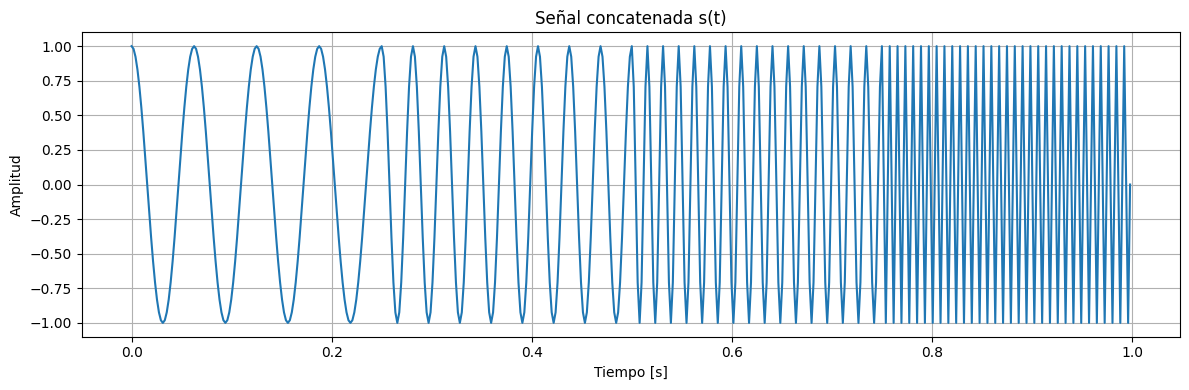

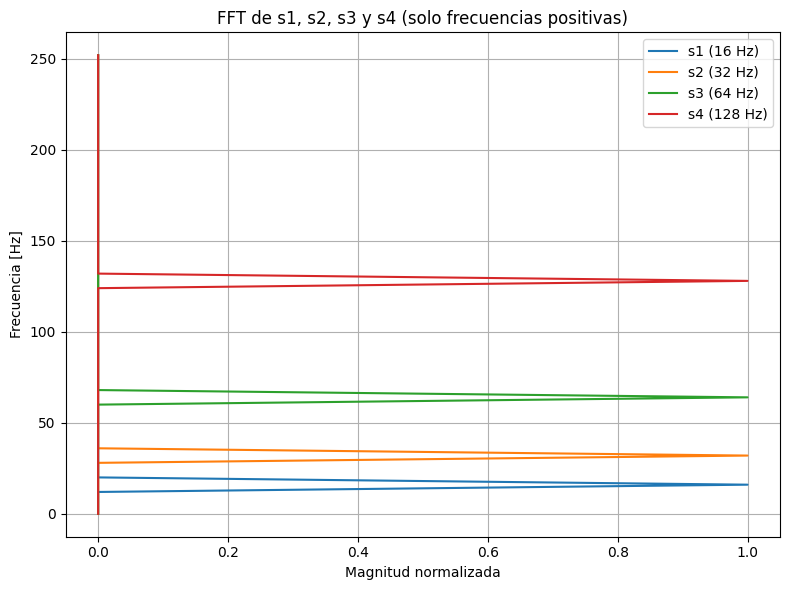

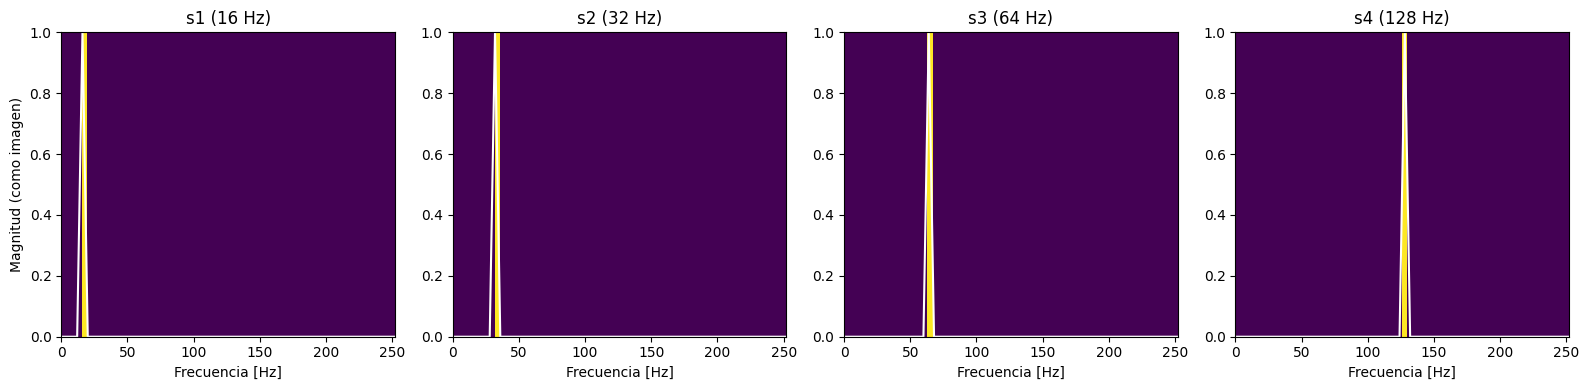

In [6]:
def senales_coseno():
    fs = 512  # frecuencia de muestreo en Hz
    duration = 0.25  # duración en segundos
    t = np.arange(0, duration, 1/fs)  # vector de tiempo

    # Frecuencias
    f1, f2, f3, f4 = 16, 32, 64, 128

    # Señales cosenoidales
    s1 = np.cos(2 * np.pi * f1 * t)
    s2 = np.cos(2 * np.pi * f2 * t)
    s3 = np.cos(2 * np.pi * f3 * t)
    s4 = np.cos(2 * np.pi * f4 * t)

    # Concatenar horizontalmente
    s = np.concatenate([s1, s2, s3, s4])

    # Nuevo eje de tiempo para la señal concatenada
    t_total = np.arange(0, len(s)) / fs

    # Graficar
    plt.figure(figsize=(12, 4))
    plt.plot(t_total, s)
    plt.title("Señal concatenada s(t)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def calular_fft():
    fs = 512
    duration = 0.25
    t = np.arange(0, duration, 1/fs)

    # Señales
    f1, f2, f3, f4 = 16, 32, 64, 128
    s1 = np.cos(2 * np.pi * f1 * t)
    s2 = np.cos(2 * np.pi * f2 * t)
    s3 = np.cos(2 * np.pi * f3 * t)
    s4 = np.cos(2 * np.pi * f4 * t)

    def compute_fft(signal, fs):
        N = len(signal)
        fft_vals = np.fft.fft(signal)
        fft_mag = np.abs(fft_vals)[:N//2]  # solo la mitad positiva
        fft_mag /= np.max(fft_mag)         # normalizar a [0, 1]
        freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
        return freqs, fft_mag

    # Calcular FFTs
    freqs1, mag1 = compute_fft(s1, fs)
    freqs2, mag2 = compute_fft(s2, fs)
    freqs3, mag3 = compute_fft(s3, fs)
    freqs4, mag4 = compute_fft(s4, fs)

    # Gráfico
    plt.figure(figsize=(8, 6))

    plt.plot(mag1, freqs1, label='s1 (16 Hz)')
    plt.plot(mag2, freqs2, label='s2 (32 Hz)')
    plt.plot(mag3, freqs3, label='s3 (64 Hz)')
    plt.plot(mag4, freqs4, label='s4 (128 Hz)')

    plt.title("FFT de s1, s2, s3 y s4 (solo frecuencias positivas)")
    plt.ylabel("Frecuencia [Hz]")
    plt.xlabel("Magnitud normalizada")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
def calcular_dft():
    fs = 512
    duration = 0.25
    t = np.arange(0, duration, 1/fs)

    # Señales
    f1, f2, f3, f4 = 16, 32, 64, 128
    s1 = np.cos(2 * np.pi * f1 * t)
    s2 = np.cos(2 * np.pi * f2 * t)
    s3 = np.cos(2 * np.pi * f3 * t)
    s4 = np.cos(2 * np.pi * f4 * t)

    # FFT y frecuencias
    def compute_fft(signal, fs):
        N = len(signal)
        fft_vals = np.fft.fft(signal)
        fft_mag = np.abs(fft_vals)[:N//2]
        fft_mag /= np.max(fft_mag)
        freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
        return freqs, fft_mag

    # Obtener FFTs
    freqs1, mag1 = compute_fft(s1, fs)
    freqs2, mag2 = compute_fft(s2, fs)
    freqs3, mag3 = compute_fft(s3, fs)
    freqs4, mag4 = compute_fft(s4, fs)

    # Crear "imagen" de la DFT (repitiendo la magnitud como filas de una matriz)
    def fft_image(mag, rows=100):
        return np.tile(mag, (rows, 1))

    # Subplot 1x4
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    fft_mags = [mag1, mag2, mag3, mag4]
    freqs = [freqs1, freqs2, freqs3, freqs4]
    titles = ['s1 (16 Hz)', 's2 (32 Hz)', 's3 (64 Hz)', 's4 (128 Hz)']

    for i in range(4):
        ax = axes[i]
        img = fft_image(fft_mags[i])
        ax.imshow(img, aspect='auto', extent=[freqs[i][0], freqs[i][-1], 0, 1], origin='lower', cmap='viridis')
        ax.plot(freqs[i], fft_mags[i], color='white', linewidth=1.5)
        ax.set_title(titles[i])
        ax.set_xlabel('Frecuencia [Hz]')
        if i == 0:
            ax.set_ylabel('Magnitud (como imagen)')
        ax.grid(False)

    plt.tight_layout()
    plt.show()
senales_coseno()
calular_fft()
calcular_dft()


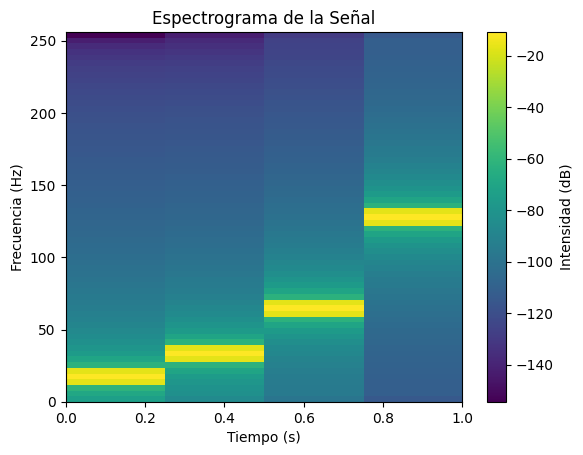

In [20]:
import matplotlib.pyplot as plt
fs = 512  # frecuencia de muestreo en Hz
duration = 0.25  # duración en segundos
t = np.arange(0, duration, 1/fs)  # vector de tiempo

# Frecuencias
f1, f2, f3, f4 = 16, 32, 64, 128

# Señales cosenoidales
s1 = np.cos(2 * np.pi * f1 * t)
s2 = np.cos(2 * np.pi * f2 * t)
s3 = np.cos(2 * np.pi * f3 * t)
s4 = np.cos(2 * np.pi * f4 * t)

# Concatenar horizontalmente
s = np.concatenate([s1, s2, s3, s4])

plt.specgram(s, Fs=fs, NFFT=128, noverlap=0, cmap='viridis', scale='dB') # scale = dB para mosrar potencia en escala log. Se nota un cambio en la figura debido a la precisión de la máquina
# NFFT es el número de puntos de la transformada por ventana. Si se toman 128 puntos, dado que
# 128*4=512, podremos ver las 4 ventanas (señales). Al contrario, si se toman 256 puntos, sólo
# podremos ver 2 ventanas.
# Si noverlap es 64 y NFFT = 128, note que se generarán 7 ventanas, cada una de 128 muetras, pero con avance de 64 hasta llegar a 512 (1segundo).

# Si se trabaja con una Fs más alta, tal que se generen muchos más puntos por segundo,
# el tamaño de vetana ya no será problema. Ejemplo: Fs=2500, con ventanas de 250ms requiere
# un máximo de 625 puntos, pero con 128 puntos por ventana podría seguir observando el fenómeno.
# Sin embargo, con Fs=2500 y NFFT=625 (el máximo posible) obtengo una figura con una mejor resolución.

# Títulos y etiquetas
plt.title('Espectrograma de la Señal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.show()

# **Construcción de un Espectrograma 2**
Señal de audio.

1. Cargue la señal de audio 'senal.wav'. Seleccione el segmento entre 18.75 ms y 318.75 ms (300ms de duración). Reproduzca la señal y grafiquela en el tiempo y en frecuencia mediante su espectrograma usando la función *plt.spectrogram()*


2. a) Divida la señal anterior en tres segmentos de 100 ms cada uno y realice una aproximación al espectrograma usando la DFT de cada segmento del mismo modo que se realizó en el punto 2 de la sección "Construcción de un Espectrograma", donde se construyó "a mano" el concepto de espectrograma usando la función "plt.imshow".

b) Dibuje el espectro de cada ventana sobre cada ventana (por ejemplo usando color rojo) de los espectrogramas calculados en el ítem anterior.

3. Usando la función *plt.spectrogram()* grafique en un sublpot de 4 espectrogramas del segmento de audio usando el mismo valor de NFFT, pero variando el parámetro *noverlap* de modo que haya 4 niveles de solapamiento incluyendo cero y un nivel alto de solapamiento, e.g., [0, 25%, 50%, y 80%].
El % se toma respecto a la cantidad de puntos de una ventana. Se recomienda trabajar con ventanas de 25ms (400 muetras para Fs=16000).


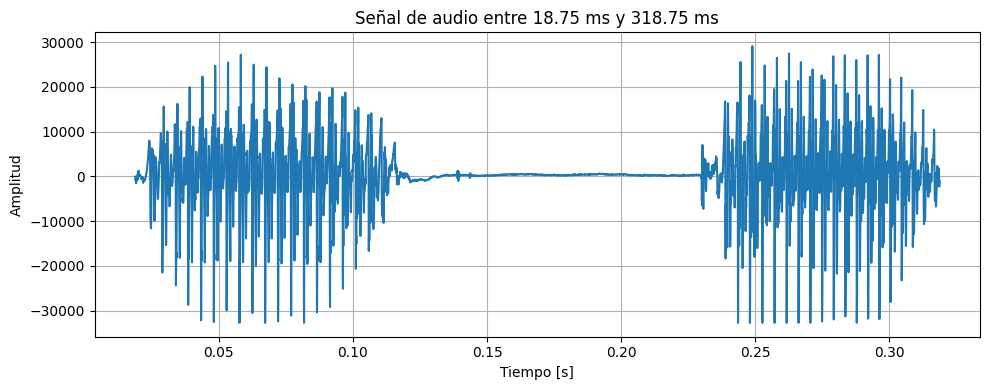

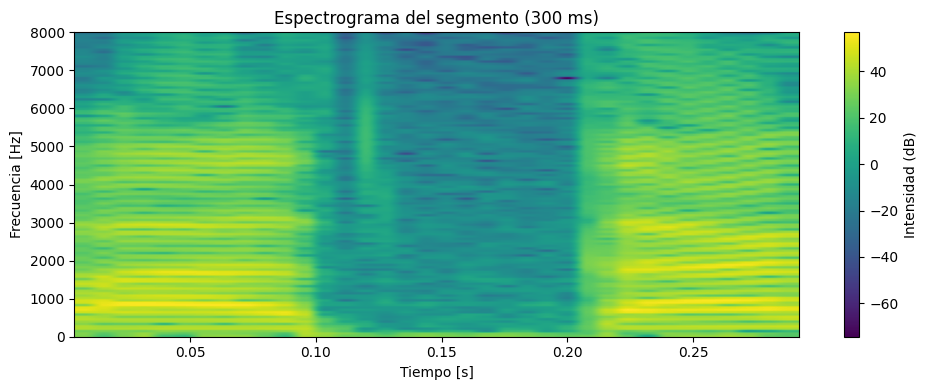

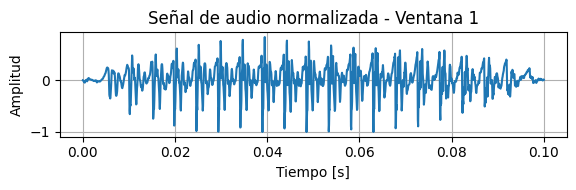

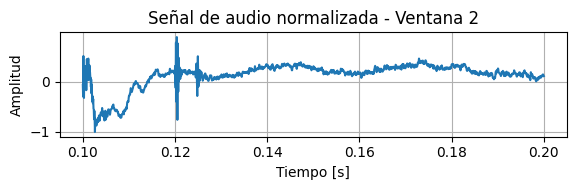

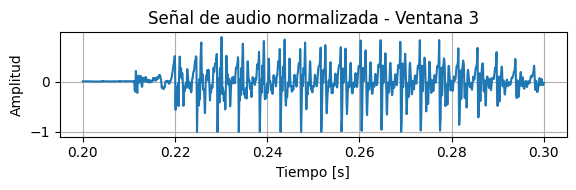

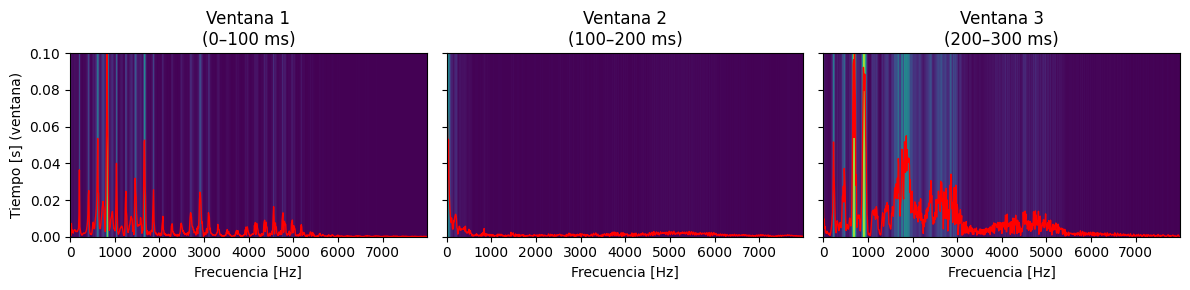

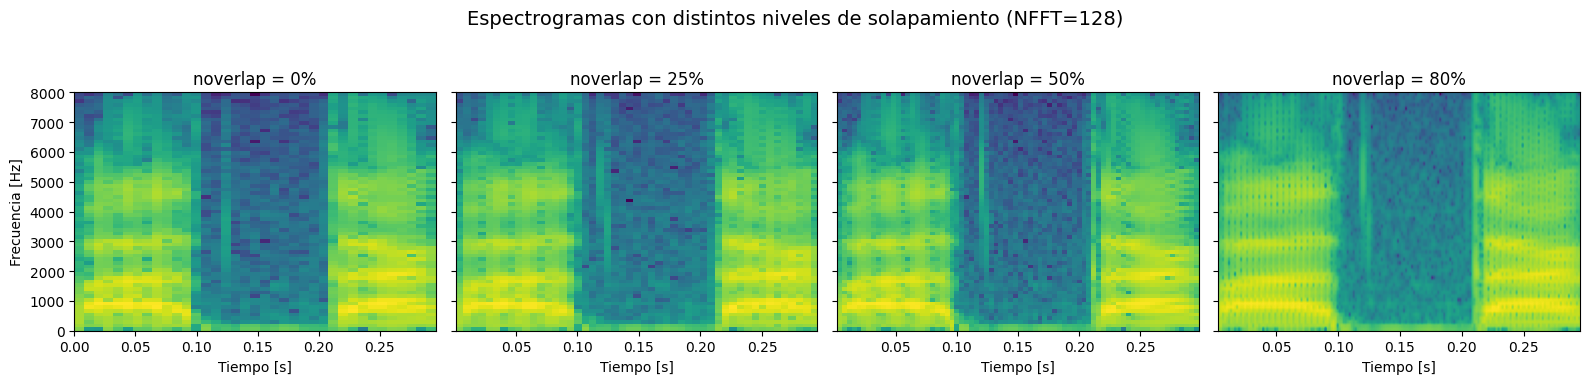

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.display import Audio, display
import urllib.request
from io import BytesIO
def espectrograma_audio():
    # 1. Cargar la señal de audio
    url = "https://raw.githubusercontent.com/jbcgames/Lab_4_senales./refs/heads/main/senal.wav"
    with urllib.request.urlopen(url) as response:
        wav_data = response.read()
    buffer = BytesIO(wav_data)

    fs, data = read(buffer)
    # 2. Si es estéreo, usar solo un canal
    if data.ndim > 1:
        data = data[:, 0]

    # 3. Seleccionar el segmento entre 18.75 ms y 318.75 ms (300 ms)
    t_start = 0.01875  # segundos
    t_end = 0.31875    # segundos
    start_idx = int(t_start * fs)
    end_idx = int(t_end * fs)

    segment = data[start_idx:end_idx]

    # 4. Reproducir el segmento de audio
    display(Audio(segment, rate=fs))

    # 5. Graficar la señal en el tiempo
    t = np.linspace(t_start, t_end, len(segment))

    plt.figure(figsize=(10, 4))
    plt.plot(t, segment)
    plt.title("Señal de audio entre 18.75 ms y 318.75 ms")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()  
    # 6. Espectrograma
    plt.figure(figsize=(10, 4))
    plt.specgram(segment, Fs=fs, NFFT=256, noverlap=128, cmap='viridis', scale='dB')
    plt.title("Espectrograma del segmento (300 ms)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Frecuencia [Hz]")
    plt.colorbar(label='Intensidad (dB)')
    plt.tight_layout()
    plt.show()
def division_audio():
    url = "https://raw.githubusercontent.com/jbcgames/Lab_4_senales./refs/heads/main/senal.wav"
    with urllib.request.urlopen(url) as response:
        wav_data = response.read()
    buffer = BytesIO(wav_data)


    # 2. Leer el archivo WAV
    fs, data = read(buffer)
    if data.ndim > 1:
        data = data[:, 0]
    t_start = 0.01875
    t_end = 0.31875
    start_idx = int(t_start * fs)
    end_idx   = int(t_end   * fs)
    segment   = data[start_idx:end_idx]

    # 2. Parámetros de ventana
    dur_win = 0.100      # 100 ms
    N_win   = int(dur_win * fs)
    n_windows = 3

    # 3. Pre-asignar arrays
    DFT_mags = []
    freqs_all = []
    for k in range(n_windows):
        # indices para cada ventana
        i0 = k * N_win
        i1 = i0 + N_win
        win = segment[i0:i1]
        display(Audio(segment[i0:i1], rate=fs))
        
        # Normalizar la ventana de audio a [-1, 1]
        if np.max(np.abs(win)) != 0:
            win = win / np.max(np.abs(win))

        # Graficar la señal de audio de la ventana actual
        t_win = np.linspace(i0 / fs, i1 / fs, len(win))
        plt.figure(figsize=(6, 2))
        plt.plot(t_win, win)
        plt.title(f"Señal de audio normalizada - Ventana {k+1}")
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Amplitud")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # FFT “a mano”
        N = len(win)
        fft_vals = np.fft.fft(win)
        mag = np.abs(fft_vals)[:N//2]
        mag = mag / np.max(mag)               # normalizar a [0,1]
        freqs = np.fft.fftfreq(N, 1/fs)[:N//2]

        DFT_mags.append(mag)
        freqs_all.append(freqs)

    # 4. Crear imagen “espectrograma” de 1×3
    fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

    for k, ax in enumerate(axes):
        mag = DFT_mags[k]
        freqs = freqs_all[k]

        # generar “imagen” repitiendo la magnitud en filas
        img = np.tile(mag, (100, 1))

        # Mostrar con imshow
        ax.imshow(img,
                aspect='auto',
                extent=[freqs[0], freqs[-1], 0, dur_win],
                origin='lower',
                cmap='viridis')
        # superponer espectro (en rojo)
        ax.plot(freqs, mag * dur_win, color='red', linewidth=1)

        ax.set_title(f'Ventana {k+1}\n({k*dur_win*1e3:.0f}–{(k+1)*dur_win*1e3:.0f} ms)')
        ax.set_xlabel('Frecuencia [Hz]')
        if k == 0:
            ax.set_ylabel('Tiempo [s] (ventana)')

    plt.tight_layout()
    plt.show()
def variacion_NFFT():
    url = "https://raw.githubusercontent.com/jbcgames/Lab_4_senales./refs/heads/main/senal.wav"
    with urllib.request.urlopen(url) as response:
        wav_data = response.read()
    buffer = BytesIO(wav_data)


    # 2. Leer el archivo WAV
    fs, data = read(buffer)
    if data.ndim > 1:
        data = data[:, 0]

    # Segmento de 300 ms: 18.75 ms a 318.75 ms
    start_idx = int(0.01875 * fs)
    end_idx = int(0.31875 * fs)
    segment = data[start_idx:end_idx]

    # Parámetros
    NFFT = 128  # tamaño fijo de la ventana
    overlap_percents = [0, 0.25, 0.5, 0.8]
    noverlap_values = [int(NFFT * p) for p in overlap_percents]

    # Crear subplots
    fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

    for i, noverlap in enumerate(noverlap_values):
        ax = axes[i]
        ax.specgram(segment, Fs=fs, NFFT=NFFT, noverlap=noverlap, cmap='viridis', scale='dB')
        ax.set_title(f'noverlap = {int(overlap_percents[i]*100)}%')
        ax.set_xlabel("Tiempo [s]")
        if i == 0:
            ax.set_ylabel("Frecuencia [Hz]")

    plt.suptitle("Espectrogramas con distintos niveles de solapamiento (NFFT=128)", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
espectrograma_audio()
division_audio()
variacion_NFFT()

